## Logistic Regression for Sentiment Analysis

Adapted from http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/outofcore_modelpersistence.ipynb

<br>
<br>

## The IMDb Movie Review Dataset

In this section, we will train a simple logistic regression model to classify movie reviews from the 50k IMDb review dataset that has been collected by Maas et. al.

> AL Maas, RE Daly, PT Pham, D Huang, AY Ng, and C Potts. Learning word vectors for sentiment analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Lin- guistics: Human Language Technologies, pages 142–150, Portland, Oregon, USA, June 2011. Association for Computational Linguistics

[Source: http://ai.stanford.edu/~amaas/data/sentiment/]

The dataset consists of 50,000 movie reviews from the original "train" and "test" subdirectories. The class labels are binary (1=positive and 0=negative) and contain 25,000 positive and 25,000 negative movie reviews, respectively.
For simplicity, I assembled the reviews in a single CSV file.


In [1]:
import pandas as pd
# if you want to download the original file:
#df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/50k_imdb_movie_reviews.csv')
# otherwise load local file
df = pd.read_csv('shuffled_movie_data.csv')
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


Let us shuffle the class labels.

In [2]:
import numpy as np
## uncomment these lines if you have dowloaded the original file:
#np.random.seed(0)
#df = df.reindex(np.random.permutation(df.index))
#df[['review', 'sentiment']].to_csv('shuffled_movie_data.csv', index=False)

<br>
<br>

## Preprocessing Text Data

Now, let us define a simple `tokenizer` that splits the text into individual word tokens. Furthermore, we will use some simple regular expression to remove HTML markup and all non-letter characters but "emoticons," convert the text to lower case, remove stopwords, and apply the Porter stemming algorithm to convert the words into their root form.

In [3]:
import numpy as np
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

Let's give it at try:

In [4]:
tokenizer('This :) is a <a> test! :-)</br>')

['test', ':)', ':)']

## Learning (SciKit)

First, we define a generator that returns the document body and the corresponding class label:

In [5]:
def stream_docs(path):
    with open(path, 'r') as csv:
        next(csv) # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

To conform that the `stream_docs` function fetches the documents as intended, let us execute the following code snippet before we implement the `get_minibatch` function:

In [6]:
next(stream_docs(path='shuffled_movie_data.csv'))

('"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />""Murder in Greenwich"" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich f

After we confirmed that our `stream_docs` functions works, we will now implement a `get_minibatch` function to fetch a specified number (`size`) of documents:

In [7]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    for _ in range(size):
        text, label = next(doc_stream)
        docs.append(text)
        y.append(label)
    return docs, y

Next, we will make use of the "hashing trick" through scikit-learns [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html) to create a bag-of-words model of our documents. Details of the bag-of-words model for document classification can be found at  [Naive Bayes and Text Classification I - Introduction and Theory](http://arxiv.org/abs/1410.5329).

In [8]:
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)

# Exercise 1: define features based on word embeddings (pre-trained word2vec / Glove/Fastext emebddings can be used)
# Define suitable d dimension, and sequence length

Using the [SGDClassifier]() from scikit-learn, we will can instanciate a logistic regression classifier that learns from the documents incrementally using stochastic gradient descent. 

In [9]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=1, n_iter=1)
doc_stream = stream_docs(path='shuffled_movie_data.csv')
# Exercise 2: Define at least a Three layer neural network. Define its structure (number of hidden neurons, etc)
# Define a nonlinear function for hidden layers.
# Define a suitable loss function for binary classification
# Implement the backpropagation algorithm for this structure
# Do not use Keras / Tensorflow /PyTorch etc. libraries
# Train the model using SGD

In [10]:
#import pyprind
#pbar = pyprind.ProgBar(45)

classes = np.array([0, 1])
for _ in range(45):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    #pbar.update()

/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages

/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/david/entorno1/lib/python3.6/site-packages

Depending on your machine, it will take about 2-3 minutes to stream the documents and learn the weights for the logistic regression model to classify "new" movie reviews. Executing the preceding code, we used the first 45,000 movie reviews to train the classifier, which means that we have 5,000 reviews left for testing:

In [11]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print('Accuracy: %.3f' % clf.score(X_test, y_test))
#Exercise 3: compare  with your Neural Network

Accuracy: 0.867


I think that the predictive performance, an accuracy of ~87%, is quite "reasonable" given that we "only" used the default parameters and didn't do any hyperparameter optimization. 

After we estimated the model perfomance, let us use those last 5,000 test samples to update our model.

In [12]:
clf = clf.partial_fit(X_test, y_test)

/home/david/entorno1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


<br>
<br>

# Model Persistence

In the previous section, we successfully trained a model to predict the sentiment of a movie review. Unfortunately, if we'd close this IPython notebook at this point, we'd have to go through the whole learning process again and again if we'd want to make a prediction on "new data."

So, to reuse this model, we could use the [`pickle`](https://docs.python.org/3.5/library/pickle.html) module to "serialize a Python object structure". Or even better, we could use the [`joblib`](https://pypi.python.org/pypi/joblib) library, which handles large NumPy arrays more efficiently.

To install:
conda install -c anaconda joblib

In [14]:
import joblib
import os
if not os.path.exists('./pkl_objects'):
    os.mkdir('./pkl_objects')
    
joblib.dump(vect, './vectorizer.pkl')
joblib.dump(clf, './clf.pkl')

['./clf.pkl']

Using the code above, we "pickled" the `HashingVectorizer` and the `SGDClassifier` so that we can re-use those objects later. However, `pickle` and `joblib` have a known issue with `pickling` objects or functions from a `__main__` block and we'd get an `AttributeError: Can't get attribute [x] on <module '__main__'>` if we'd unpickle it later. Thus, to pickle the `tokenizer` function, we can write it to a file and import it to get the `namespace` "right".

In [15]:
%%writefile tokenizer.py
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

Writing tokenizer.py


In [16]:
from tokenizer import tokenizer
joblib.dump(tokenizer, './tokenizer.pkl')

['./tokenizer.pkl']

Now, let us restart this IPython notebook and check if the we can load our serialized objects:

In [17]:
import joblib
tokenizer = joblib.load('./tokenizer.pkl')
vect = joblib.load('./vectorizer.pkl')
clf = joblib.load('./clf.pkl')

After loading the `tokenizer`, `HashingVectorizer`, and the tranined logistic regression model, we can use it to make predictions on new data, which can be useful, for example, if we'd want to embed our classifier into a web application -- a topic for another IPython notebook.

In [18]:
example = ['I did not like this movie']
X = vect.transform(example)
clf.predict(X)

array([0])

In [19]:
example = ['I loved this movie']
X = vect.transform(example)
clf.predict(X)

array([1])

# Solucion de Tareas

## Tarea 1: WordEmbeddings

## Cargando dataset

In [9]:
#RAW DATA
doc_stream = stream_docs(path='shuffled_movie_data.csv')
TOTAL_EXAMPLES = 50000

X_full , y_full = get_minibatch(doc_stream, size=TOTAL_EXAMPLES)

## Definiendo nuevas caracteristicas usando Word Embeddings

In [10]:
#configuracion
MAX_NB_WORDS = 1000
MAX_SEQUENCE_LENGTH = 1000
N_FEATURES = 50 #dimension


In [11]:
#Carga de word Embedings preentrenados
glove_file = 'pretrained/glove.twitter.27B.' + str(N_FEATURES) + 'd.txt'
emb_dict = {}
glove = open(glove_file)
for line in glove:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    emb_dict[word] = vector
glove.close()

In [12]:

#Creacion del vocabulario del dataset

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#MAX_NB_WORDS = 1000
#MAX_SEQUENCE_LENGTH = 1000
#N_FEATURES = 500 #dimensiones

tokenizer_k = Tokenizer(nb_words=MAX_NB_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,split=" ")
tokenizer_k.fit_on_texts(X_full)
sequences = tokenizer_k.texts_to_sequences(X_full)
word_index = tokenizer_k.word_index #vocabulario del dataset
N_WORDS = len(word_index) #numero de palabras unicas en el dataset
print('%s palabras unicas.' %N_WORDS)

Using TensorFlow backend.
/home/david/enviroment1/lib/python3.6/site-packages/keras_preprocessing/text.py:177: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


124252 palabras unicas.


## Vectorizacion del Dataset

In [13]:
# Funcion que convierte un documento en un vector promediando vectores "wordEmbeddings" 
# en un documento
def document2Vector(vocabulario_emb,n_features,documento):
    # n_features: dimension del vector
    # documentos: documento (string)
    vector = np.zeros((1,n_features),dtype="float64")
    words = tokenizer(documento)
    nwords = 0
    for word in words:
        #print(word)
        word_emb = vocabulario_emb.get(word)
        if word_emb is not None:
            vector = vector+word_emb
            nwords = nwords + 1.
        if nwords > 0:
            vector = vector/nwords
    vector = vector.reshape((1,n_features))
    
    return vector

In [14]:
#funcion que transforma documentos(corpus) a vectores numericos usando word embeddings.
def corpus2Matrix(corpus,n_examples, n_features):
    matrix = np.zeros((n_examples, n_features))
    for i in range(n_examples):
        vector = document2Vector(emb_dict,n_features,corpus[i])
        matrix[i,:]=vector
    return matrix

In [15]:
#DEFINICION DE NUEVAS CARACTERISTICAS: Llamado de las funciones antes definidas.
#Este proceso puede demorar, por lo que solo se ejecuto una vez y se guardo la matriz en
#un csv, si desea ejecutar descomente las siguientes 2 lineas

# mm=corpus2Matrix(X_full,TOTAL_EXAMPLES, N_FEATURES)
# np.savetxt('matrix_embeding.csv', mm)

In [16]:
# Carga de datos
X=np.loadtxt('matrix_embeding.csv')

In [17]:
X[4999,:]*1000

array([ 2.85943805e+00,  7.38123272e+00,  1.46705481e+00,  9.72945218e+00,
        5.22433995e+00,  7.41486819e+00, -2.55768936e+00, -7.21698208e+00,
       -1.49197189e+01,  1.26258351e+01,  1.22040412e-02, -5.59405800e+00,
       -7.45950954e+01,  3.87127456e+00,  1.47605948e+00, -1.79205429e+00,
       -1.87753448e+00, -1.48723162e+01,  1.42286481e+01, -1.93803025e+01,
        1.20541145e+01, -2.48077569e+01, -1.69078658e+01,  2.87255739e+00,
       -2.70150774e+00,  9.73868861e+00,  4.04079820e+00,  1.80627954e+01,
        1.22514234e+01, -7.25935981e+00,  8.97527220e+00, -2.68062982e+01,
       -1.09637660e+01,  1.31277811e+01,  1.19127136e+00, -7.35215776e-02,
       -5.84384086e+00, -4.39610754e-01,  3.23169969e+00, -3.12058283e+00,
        1.34781204e-01,  2.52596089e+01,  1.20194906e+01, -8.99204988e+00,
        4.02771434e+00,  8.53921274e+00,  2.79846213e+00, -1.11368558e+01,
        1.03696832e+01, -8.51225833e+00])

# Tarea 2: Implementacion de Red Neuronal

## Division de datos de entrenamiento y test

In [23]:
from sklearn.model_selection import train_test_split

m_train = 45000 #numero de ejemplos de entrenamiento
m_test = 5000 #numero de ejemplos de prueba
y_full = np.array(y_full)
y_full = y_full.reshape(TOTAL_EXAMPLES,1)
X_train, X_test, y_train, y_test = train_test_split(X, y_full, test_size=0.1)

X_train = np.transpose(X_train)
y_train = np.transpose(y_train)
X_test = np.transpose(X_test)
y_test = np.transpose(y_test)
print('ejemplos entrenamiento: ',X_train.shape)
print('ejemplos entrenamiento (labels): ',y_train.shape)
print('ejemplos test: ',X_test.shape)
print('ejemplos test (labels): ',y_test.shape)

ejemplos entrenamiento:  (50, 45000)
ejemplos entrenamiento (labels):  (1, 45000)
ejemplos test:  (50, 5000)
ejemplos test (labels):  (1, 5000)


## Definicion de la Arquitectura de la Red Neuronal

In [85]:
# Funcion que define la arquitectura de la red neuronal
def layer_sizes(X, Y, n_h):
    """
    X -- ejemplos de entrenamiento
    Y -- etiquetas de X
    
    Returns:
    n_x -- numero de neuronas en la capa de entrada
    n_h -- numero de neuronas de la capa oculta
    n_y -- numero de neuronas de la capa de salida
    """
    n_x = X.shape[0] # input layer
    n_h = n_h
    n_y = Y.shape[0] # output layer
    
    return (n_x, n_h, n_y)

In [86]:
(n_x, n_h, n_y) = layer_sizes(X_train, y_train, n_h)
print("Tamaño de capa de entrada: n_x = " + str(n_x))
print("Tamaño de capa  oculta: n_h = " + str(n_h))
print("Tamaño de capa de salida: n_y = " + str(n_y))

Tamaño de capa de entrada: n_x = 50
Tamaño de capa  oculta: n_h = 4
Tamaño de capa de salida: n_y = 1


## Inicializacion de parametros

In [26]:
def initialize_parameters(n_x, n_h, n_y):
    """
    n_x -- Tamaño de capa de entrada
    n_h -- Tamaño de capa  oculta
    n_y -- Tamaño de capa de salida
    
    Returns:
    params -- diccionario con parametros
    """
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [27]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"].shape))
print("b1 = " + str(parameters["b1"].shape))
print("W2 = " + str(parameters["W2"].shape))
print("b2 = " + str(parameters["b2"].shape))

W1 = (4, 50)
b1 = (4, 1)
W2 = (1, 4)
b2 = (1, 1)


## Funciones de activacion

In [48]:
#definicion de funcion sigmoide
def sigmoid(z):
    s=1/(1+np.exp(-z))    
    return s

#Funcion tangente hyperbolica
def s_tanh(z):
    t = np.tanh(z)
    return t

## Forward Propagation

In [168]:
def s_forward_propagation(X, parameters):
    """
    X -- datos de entrenamiento(n_x, m)
    parameters -- diccionario con parametros inicializados
    
    Returns:
    A2 -- Activacion de la capa final (sigmoide)
    cache -- Diccionario con calculos intermedios "Z1", "A1", "Z2" y "A2"
    """
    # Parametros
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid(Z1)
#     A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Funcion de costo

In [80]:
def s_compute_cost(a2, yi, parameters):
    """
    A2 -- Salida de activacion de la ultima capa (1, numero de ejemplos)
    Y -- etiquetas del conjunto de entrenamiento (1, numero de ejemplos)
    parameters -- diccionario con parametros W1, b1, W2 and b2
    
    Returns:
    cost -- funcion de costo (cross-entropy)
    """
    
    a2 = np.squeeze(a2)
    yi = np.squeeze(yi)
    
    logprobs = yi*np.log(a2) + (1-yi)*np.log(1-a2)
    cost = -logprobs
    
    cost = np.squeeze(cost)
#     print('costo: ',cost)
    assert(isinstance(cost, float))
    
    return cost

In [31]:
# Funcion que se encarga de actualizar los parametros despues de una epoca

def s_update_parameters(parameters, grads, learning_rate):
    """
    parameters -- parametros
    grads -- gradientes
    learning_rate -- coeficiente de aprendizaje
    
    Returns:
    parameters -- parametros actualizados
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Actualizacion
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Backward Propagation

In [172]:
#Propagacion hacia atras (Estocastico)
def s_backward_propagation(parameters, cache, X, Y,learning_rate):
    
    m = X.shape[1]
    n = X.shape[0]
    
    # Activaciones de forward prop.
    A1 = cache["A1"]
    A2 = cache["A2"]
   
    i = np.random.random_integers(0, m-1) #indice aleatorio
    print('i',i)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    a1 = A1[:,i].reshape(A1[:,i].shape[0],1) #activacion de un ejemplo en la primera capa
    a2 = A2[:,i].reshape(A2[:,i].shape[0],1) #activacion de un ejemplo en la ultima capa
#     print('W1.shape',W1.shape)
#     print('W2.shape',W2.shape)
#     print('A1.shape',A1.shape)
#     print('A2.shape',A2.shape)
#     print('a1.shape',a1.shape)
#     print('a2.shape',a2.shape)
    
    
    xi = X[:,i].reshape(X[:,i].shape[0],1)#ejemplo aleatorio
    yi = Y[:,i].reshape(Y[:,i].shape[0],1)#etiqueta
    
    ##Calculo del costo para un unico ejemplo
    costo = s_compute_cost(a2, yi, parameters)
    
    ## Backward propagation: calculo de dW1, db1, dW2, db2. 
    dZ2 = a2 - yi    
    dW2 = dZ2*np.transpose(a1)
    db2 = dZ2#1x1
    gp = sigmoid(a1)*(1-sigmoid(a1))#derivada de sigmoide
#     gp = 1-np.power(a1,2)#derivada de tanh
    dZ1 = np.multiply(np.dot(np.transpose(W2),dZ2),gp)
    dW1 = np.dot(dZ1,np.transpose(xi))
    db1 = dZ1
#     print('dZ2.shape',dZ2.shape)
#     print('dW2.shape',dW2.shape)
#     print('db2.shape',db2.shape)
#     print('dZ1.shape',dZ1.shape)
#     print('dW1.shape',dW1.shape)
#     print('db1.shape',db1.shape)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return  costo, grads

## Gradiente Descendente Estocastico

In [179]:
def nn_modelo(X, Y, n_h, num_iterations, print_cost,learning_rate):
    """
    Argumentos:
    X -- conjunto de entrenamiento
    Y -- etiquetas de entrenamiento
    n_h -- numero de neuronas en la capa oculta
    num_iterations -- Numero de epocas 
    print_cost -- imprimir costos
    
    Retorna:
    parameters -- parametros aprendidos.
    costos -- array historico de costos
    """
    
    n_x, n_h, n_y = layer_sizes(X, Y,n_h)
    print('(n_x, n_h, n_y):',n_x, n_h, n_y)
#     n_h = layer_sizes(X, Y)[1]
#     n_y = layer_sizes(X, Y)[2]
    
   ##Inicializacion de parametros
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    # Gradiente Descendente Estocatico
    costos = []
    for i in range(0, num_iterations):
         
        # Forward propagation.
        A2, cache = s_forward_propagation(X, parameters)

        # Backpropagation. 
        costo,grads = s_backward_propagation(parameters, cache, X, Y,learning_rate)
        costos.append(costo)
        
        # Gradient descent parameter update. 
        parameters = s_update_parameters(parameters, grads,learning_rate)
#         print('prm: ',parameters)
        
#         print ("Cost after iteration %i: %f" %(i, costo))
        
#         
        # Print the cost every 1000 iterations
#         cost = costs[len(costs)-1]
#         if print_cost and i % 1000 == 0:
#             print ("Cost after iteration %i: %f" %(i, costo))

    return costos,parameters

In [117]:
## Funcion que realiza predicciones
## Threshold = 0.5
def s_predict(parameters, X):
    A2, cache = s_forward_propagation(X,parameters)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions

## Entrenamiento

In [180]:
import matplotlib.pyplot as plt
def plotConvergence(jvec,iterations):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergencia Stochastic Gradient Descendt")
    plt.xlabel("Numero de Iteraciones")
    plt.ylabel("Funcion de Costo")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
#     dummy = plt.xlim([-0.05*iterations,10.0*iterations])

In [186]:
costos, parameters = nn_modelo(X_train, y_train, 4, num_iterations=4500, 
                               print_cost=True,learning_rate=0.5)

(n_x, n_h, n_y): 50 4 1
i 30480
i 10505
i 36548
i 39334
i 5444
i 3086
i 22247
i 29875
i 31599
i 18135


/home/david/enviroment1/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 44999 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


i 494
i 19246
i 22396
i 29219
i 43466
i 12676
i 40079
i 148
i 28966
i 37403
i 22275
i 42261
i 11449
i 4179
i 40342
i 5030
i 23765
i 44178
i 44031
i 3044
i 29303
i 35548
i 32486
i 7583
i 37212
i 5991
i 29905
i 23265
i 30350
i 2252
i 29724
i 28863
i 37545
i 37828
i 15777
i 14360
i 5656
i 35373
i 18391
i 29686
i 17856
i 19200
i 17076
i 8414
i 26196
i 39789
i 7514
i 21776
i 14099
i 17197
i 9546
i 22960
i 12899
i 33096
i 23469
i 32291
i 13419
i 37028
i 27752
i 10719
i 21264
i 31485
i 31874
i 20642
i 26046
i 37636
i 41463
i 41089
i 18081
i 17266
i 9096
i 946
i 2320
i 4974
i 12392
i 28130
i 43790
i 17545
i 2840
i 27456
i 36323
i 14798
i 15646
i 13638
i 37011
i 20059
i 30060
i 24006
i 38716
i 23619
i 5311
i 31536
i 10458
i 8927
i 25668
i 15170
i 29801
i 6246
i 7789
i 18664
i 36646
i 24059
i 40894
i 26451
i 21774
i 1376
i 36684
i 13151
i 34380
i 55
i 34206
i 3494
i 13147
i 8972
i 6472
i 15599
i 29648
i 25065
i 16054
i 30398
i 39179
i 4112
i 35889
i 7581
i 26665
i 30075
i 2879
i 29827
i 37235
i 

i 43098
i 39393
i 4444
i 7115
i 1217
i 39747
i 26836
i 19786
i 28969
i 993
i 21474
i 40894
i 22400
i 39706
i 37795
i 44986
i 3398
i 14432
i 11539
i 28308
i 16859
i 4098
i 44517
i 18914
i 3227
i 40365
i 44534
i 41848
i 42165
i 24933
i 14538
i 18216
i 9655
i 31047
i 16323
i 10226
i 33229
i 42151
i 40007
i 34441
i 29636
i 15607
i 25150
i 31990
i 36144
i 34375
i 26122
i 2398
i 27393
i 28352
i 14602
i 44184
i 32711
i 26450
i 11397
i 17199
i 21256
i 40090
i 24683
i 28080
i 28811
i 33488
i 36696
i 28834
i 27860
i 8278
i 29371
i 5873
i 38594
i 19276
i 17289
i 1684
i 9053
i 1038
i 6075
i 30347
i 23095
i 12268
i 19814
i 15182
i 27781
i 6048
i 12842
i 42056
i 9923
i 10527
i 42847
i 44172
i 24524
i 36657
i 39321
i 16852
i 20836
i 27045
i 43339
i 29075
i 42371
i 40416
i 36902
i 39945
i 925
i 14990
i 16598
i 24587
i 15905
i 3171
i 37858
i 8764
i 5866
i 27256
i 2697
i 21388
i 28034
i 31267
i 23272
i 44806
i 41246
i 3847
i 44632
i 38019
i 15732
i 38745
i 23114
i 10362
i 27642
i 7451
i 27818
i 23177
i 

i 692
i 44231
i 15398
i 13235
i 39536
i 42777
i 7620
i 18908
i 41278
i 39027
i 31619
i 35036
i 41195
i 23294
i 20717
i 19224
i 32646
i 41410
i 8527
i 24172
i 1710
i 16802
i 577
i 2832
i 7046
i 21578
i 11310
i 6058
i 24169
i 30248
i 22511
i 26352
i 18995
i 42377
i 40156
i 32620
i 4652
i 32994
i 25884
i 14548
i 26011
i 43982
i 33358
i 37981
i 37143
i 32560
i 25824
i 24680
i 18239
i 23110
i 6829
i 33757
i 34429
i 7079
i 24230
i 58
i 15967
i 39951
i 35801
i 27780
i 28211
i 36970
i 3403
i 14202
i 6982
i 7686
i 15857
i 22498
i 29970
i 32661
i 30974
i 30116
i 366
i 32417
i 25714
i 16404
i 123
i 1989
i 13649
i 26611
i 13787
i 24955
i 9633
i 44868
i 6236
i 31315
i 23011
i 33876
i 18793
i 33525
i 31947
i 21926
i 7287
i 37022
i 32456
i 26728
i 26154
i 41324
i 28835
i 44093
i 27516
i 39503
i 12878
i 21784
i 10212
i 17268
i 39112
i 34618
i 2713
i 13005
i 17632
i 1569
i 41919
i 41676
i 26658
i 34973
i 24637
i 39000
i 10966
i 15934
i 1889
i 19716
i 32594
i 6150
i 28285
i 26303
i 32267
i 11897
i 12364

i 7833
i 30426
i 20145
i 33385
i 18919
i 39313
i 1726
i 6755
i 29040
i 16539
i 32164
i 33212
i 21002
i 40670
i 27460
i 43285
i 28187
i 32914
i 7649
i 31651
i 20260
i 26918
i 2718
i 43727
i 42985
i 13299
i 26277
i 38883
i 19992
i 9488
i 40887
i 10523
i 15897
i 27739
i 29412
i 21330
i 11215
i 17843
i 14456
i 11661
i 33065
i 22567
i 1009
i 12990
i 41061
i 39389
i 24169
i 20170
i 19305
i 14991
i 27594
i 5930
i 22850
i 41578
i 30675
i 17869
i 24915
i 12966
i 6508
i 30731
i 22305
i 42657
i 28678
i 5245
i 12316
i 43094
i 26371
i 7260
i 24161
i 37606
i 44298
i 3301
i 38889
i 40270
i 12460
i 22285
i 37497
i 35156
i 12311
i 13406
i 42888
i 33620
i 4678
i 8011
i 15983
i 37105
i 27373
i 37940
i 9565
i 2200
i 25676
i 722
i 4939
i 10552
i 27361
i 25066
i 18661
i 26702
i 29635
i 24918
i 20576
i 9105
i 14515
i 44117
i 8716
i 38702
i 33543
i 24670
i 11749
i 25077
i 41584
i 4376
i 6953
i 39361
i 38831
i 2073
i 17866
i 16461
i 41223
i 40031
i 8580
i 36747
i 9420
i 32443
i 25618
i 25835
i 32790
i 14768
i 

i 38135
i 13178
i 2927
i 1186
i 12664
i 14370
i 8730
i 2898
i 42260
i 17983
i 5466
i 9574
i 15043
i 16115
i 22648
i 32215
i 1938
i 10490
i 12124
i 15885
i 35553
i 13959
i 23873
i 23010
i 44426
i 30889
i 39617
i 3310
i 14889
i 7380
i 4374
i 42443
i 35753
i 41158
i 544
i 2227
i 5465
i 8652
i 4288
i 12660
i 16723
i 43626
i 294
i 2238
i 41445
i 33589
i 30790
i 7014
i 4986
i 3090
i 40405
i 10672
i 211
i 29647
i 30568
i 41533
i 35107
i 36522
i 22679
i 18437
i 21124
i 4285
i 37993
i 32462
i 1186
i 28208
i 9263
i 20137
i 41716
i 40211
i 9888
i 6896
i 41817
i 29597
i 34068
i 808
i 13112
i 39012
i 34318
i 32627
i 43917
i 39950
i 5715
i 9142
i 13536
i 13910
i 36492
i 36250
i 21089
i 25692
i 30850
i 2449
i 3360
i 42179
i 35950
i 37399
i 42185
i 44900
i 7168
i 40021
i 34985
i 18945
i 31268
i 3935
i 13650
i 28450
i 25760
i 19601
i 578
i 33268
i 2863
i 8564
i 5553
i 44327
i 5517
i 41896
i 14943
i 28264
i 29077
i 7410
i 13214
i 31974
i 42275
i 43641
i 16359
i 18089
i 36185
i 40778
i 21640
i 5822
i 667

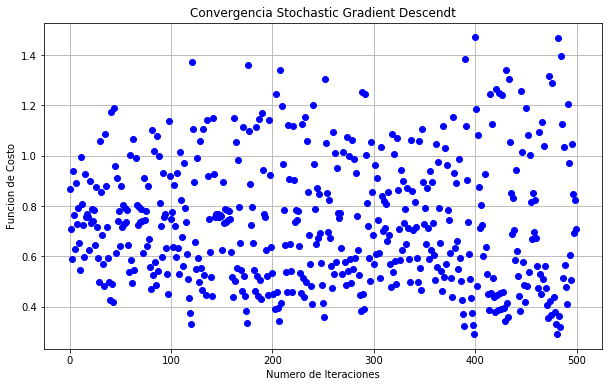

In [187]:
# costos
len(costos)
# plotConvergence(costos,len(costos))
length = 500
plotConvergence(costos[len(costos)-length:len(costos)],length)

In [188]:
predictions = s_predict(parameters, X_test)
accuracy = float((np.dot(y_test,predictions.T) + np.dot(1-y_test,1-predictions.T))/float(y_test.size)*100)
accuracy
# A2, cache = s_forward_propagation(X_test,parameters)
# predictions
# np.mean(predictions == y_test)

49.419999999999995

In [140]:
from sklearn.metrics import accuracy_score
print('Exactitud: ',accuracy_score(y_test, A2))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
plot_decision_boundary(lambda x: s_predict(parameters, x.T), X, Y)

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    costos,parameters = nn_modelo(X, Y, n_h, num_iterations = 5000, print_cost=False,learning_rate=0.5)
    plot_decision_boundary(lambda x: s_predict(parameters, x.T), X, Y)
    predictions = s_predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))